In [81]:
import pandas as pd
import numpy as np
import re

import gensim
from gensim.models.ldamulticore import LdaMulticore
from gensim import corpora, models
import pyLDAvis.gensim

import warnings
warnings.simplefilter('ignore')

from itertools import chain
import spacy

In [82]:
nlp=spacy.load('en_core_web_sm')
from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS


In [83]:
stops="good,sure,okay,great,hello,ok,yeah,thanks,alright,please,lol,yes,cool,wow,hi,oh,pm,message deleted,thank"
temp=stops.split(',')
print(temp)
for i in temp:
    STOP_WORDS.add(i)

['good', 'sure', 'okay', 'great', 'hello', 'ok', 'yeah', 'thanks', 'alright', 'please', 'lol', 'yes', 'cool', 'wow', 'hi', 'oh', 'pm', 'message deleted', 'thank']


In [84]:
x="good morning nigga alright then lol"
y=x.split()

for word in y:
    if word not in STOP_WORDS:
        print(word)

morning
nigga


In [85]:
df=pd.read_csv("Finely prepped.csv")

In [86]:
df2=pd.read_csv("Without empty strings.csv")

In [87]:
df.drop(['index','Message_Raw','Message_Only_Text',"Date",'Hour','Day_of_Week'],axis=1,inplace=True)


In [88]:
df.head(50)

,User,Message_Clean
0,AI Derek,Good morning guys and I’m happy to have you here
1,AI Derek,So today we gonna have our webinar on data sci...
2,AI Derek,And so that means soon we should be launching ...
3,AI Derek,By way of roles and responsibilities
4,AI Derek,Gentlemen I welcome you all
5,AI Derek,Let’s feel free to interact and share with oth...
6,Norbert Notitia,Thanks for the opportunity once again. Can't w...
7,AI Derek,Great
8,AI Derek,Also please do well to send us a portrait of y...
9,AI Derek,Also add a small bio of yourself and your role...


In [89]:
for i in df.User.unique():
     STOP_WORDS.add(i)
    

In [90]:
STOP_WORDS

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'AI Derek',
 'Adwoa Notitia',
 'Alex Notitia',
 'Norbert Notitia',
 'Sadat Notitia',
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'alright',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'cool',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',


In [91]:
df.shape

(1585, 2)

In [92]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

lem=WordNetLemmatizer()
corpus=[]

In [93]:
df['Message_Clean'][1]

'So today we gonna have our webinar on data science'

In [94]:
for i in range(0,len(df)):
    x=re.sub('[^a-zA-Z]',' ',df['Message_Clean'][i])
    x=x.lower()
    x=x.split()
    
    x=[lem.lemmatize(word) for word in x if not word in stopwords.words('english') and not word in STOP_WORDS]
    x=' '.join(x)
    corpus.append(x)

In [95]:
corps=[]

for i in corpus:
    if i != '':
        corps.append(i)
    

In [96]:
corps=[]

for i in corpus:
    if i != '':
        x=i.split()
        for j in x:
            corps.append([j])
    

In [97]:
corps

[['morning'],
 ['guy'],
 ['happy'],
 ['today'],
 ['gonna'],
 ['webinar'],
 ['data'],
 ['science'],
 ['mean'],
 ['soon'],
 ['launching'],
 ['platform'],
 ['way'],
 ['role'],
 ['responsibility'],
 ['gentleman'],
 ['welcome'],
 ['let'],
 ['feel'],
 ['free'],
 ['interact'],
 ['share'],
 ['going'],
 ['stuff'],
 ['opportunity'],
 ['wait'],
 ['join'],
 ['send'],
 ['portrait'],
 ['use'],
 ['design'],
 ['introduce'],
 ['team'],
 ['notitia'],
 ['world'],
 ['add'],
 ['small'],
 ['bio'],
 ['role'],
 ['notitia'],
 ['social'],
 ['medium'],
 ['detail'],
 ['email'],
 ['address'],
 ['gonna'],
 ['use'],
 ['notitia'],
 ['minute'],
 ['start'],
 ['sharp'],
 ['start'],
 ['hope'],
 ['paul'],
 ['azunre'],
 ['speaking'],
 ['let'],
 ['hype'],
 ['record'],
 ['gimme'],
 ['hosting'],
 ['right'],
 ['able'],
 ['picture'],
 ['moving'],
 ['moment'],
 ['need'],
 ['design'],
 ['flyer'],
 ['pic'],
 ['use'],
 ['sharp'],
 ['sharp'],
 ['job'],
 ['big'],
 ['ups'],
 ['derrick'],
 ['pulling'],
 ['traction'],
 ['exactly'],
 ['f

In [98]:
len(corps)

3282

In [99]:
dictionary=corpora.Dictionary(corps)
print(dictionary.num_nnz)

3282


In [100]:
doc_term_matrix=[dictionary.doc2bow(doc) for doc in corps]
print(len(doc_term_matrix))

3282


In [101]:
lda=gensim.models.ldamodel.LdaModel

In [102]:
num_topics=5

ldamodel=lda(doc_term_matrix,num_topics=num_topics,id2word=dictionary,passes=50,minimum_probability=0.07)

In [103]:
ldamodel.print_topics(num_topics)

[(0,
  '0.028*"share" + 0.024*"meeting" + 0.023*"link" + 0.021*"available" + 0.020*"tomorrow" + 0.018*"join" + 0.018*"question" + 0.015*"sent" + 0.014*"nice" + 0.013*"program"'),
 (1,
  '0.043*"need" + 0.034*"people" + 0.033*"think" + 0.025*"com" + 0.021*"yh" + 0.019*"webinar" + 0.019*"mentor" + 0.018*"look" + 0.017*"derek" + 0.017*"working"'),
 (2,
  '0.035*"let" + 0.030*"morning" + 0.028*"start" + 0.019*"site" + 0.019*"check" + 0.014*"hope" + 0.011*"minute" + 0.011*"profile" + 0.009*"car" + 0.008*"day"'),
 (3,
  '0.041*"work" + 0.034*"guy" + 0.028*"awesome" + 0.027*"data" + 0.025*"use" + 0.022*"form" + 0.022*"time" + 0.021*"ready" + 0.021*"like" + 0.020*"science"'),
 (4,
  '0.048*"send" + 0.037*"notitia" + 0.026*"email" + 0.023*"http" + 0.017*"ai" + 0.015*"create" + 0.012*"taxi" + 0.011*"google" + 0.011*"evening" + 0.011*"going"')]

In [104]:
lda_display=pyLDAvis.gensim.prepare(ldamodel,doc_term_matrix,dictionary,sort_topics=False,mds='mmds')

pyLDAvis.display(lda_display)

In [105]:
from wordcloud import WordCloud

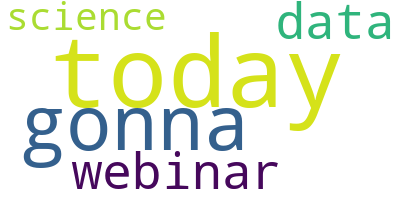

In [106]:
wordcloud = WordCloud(background_color = "white", max_words = 10,contour_width = 3, contour_color = 'steelblue')    
wordcloud.generate(corpus[1])
wordcloud.to_image()